In [1]:
import pandas as pd
import numpy as np
import os
import time

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots

In [2]:
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

os.getcwd()

wholeDataset = pd.read_csv('C:/Users/Kacper/Desktop/University/Visualisation/Group/all_passes.csv')
wholeDataset[['start_x','end_x']] = wholeDataset[['start_x','end_x']]/100 * 68 # transofrming x coordinates to width in m
wholeDataset[['start_y','end_y']] = wholeDataset[['start_y','end_y']]/100 * 105 # transofrming x coordinates to width in m
wholeDataset.drop(['a','injurytime_play', 'through_ball', 'throw_ins'], axis = 1, inplace = True)

In [3]:
def make_division(pitch_width, pitch_length, divideByX, divideByY):
    """Creates a list of divideByX*divideByY nested lists that set up the bounaries of the different parts of the pitch"""
    div = []
    step_width = pitch_width/3
    step_height = pitch_length/4
    for i in range (0,divideByY):
        for k in range(0,divideByX):
            div.append([k*step_width,(k+1)*step_width, i*step_height, (i+1)*step_height ]) #format [start_x, end_x, start_y, end_y]
    return div

In [4]:
def compare_to_part(x,y, pitch_devisions):
    #print("going_in",x,y)
    for i in range (len(pitch_devisions)):
        if ((pitch_devisions[i][0] <= x <= pitch_devisions[i][1]) & (pitch_devisions[i][2] <= y <= pitch_devisions[i][3])):
            return i+1

### example
data = wholeDataset[wholeDataset['match_id'] == 30695]
pitch_devisions = make_division(68,105,3,4)
pitch_devisions

[[0.0, 22.666666666666668, 0.0, 26.25],
 [22.666666666666668, 45.333333333333336, 0.0, 26.25],
 [45.333333333333336, 68.0, 0.0, 26.25],
 [0.0, 22.666666666666668, 26.25, 52.5],
 [22.666666666666668, 45.333333333333336, 26.25, 52.5],
 [45.333333333333336, 68.0, 26.25, 52.5],
 [0.0, 22.666666666666668, 52.5, 78.75],
 [22.666666666666668, 45.333333333333336, 52.5, 78.75],
 [45.333333333333336, 68.0, 52.5, 78.75],
 [0.0, 22.666666666666668, 78.75, 105.0],
 [22.666666666666668, 45.333333333333336, 78.75, 105.0],
 [45.333333333333336, 68.0, 78.75, 105.0]]

In [5]:
start_x = data['start_x'][0]
start_y = data['start_y'][0]
start_x

31.483999999999998

In [6]:
start_y

47.984999999999999

In [7]:
compare_to_part(start_x,start_y, pitch_devisions)

5

In [8]:
data

,action_type,assists,competition,end_x,end_y,headed,k,kickoff,long_ball,match_id,mins,minsec,player_id,secs,start_x,start_y,team_id,type
0,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,38.556,18.270,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,298,2085,58,31.484,47.985,96,completed
1,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,31.484,47.985,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,296,7530,56,45.696,78.120,96,completed
2,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,45.696,78.120,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,292,2094,52,50.864,92.400,96,completed
3,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,52.292,96.285,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,288,458,48,59.704,89.355,96,completed
4,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,59.024,87.990,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,286,2085,46,46.308,65.520,96,completed
5,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,46.308,65.520,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,283,4125,43,51.068,78.540,96,completed
6,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,50.116,91.245,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,280,458,40,60.180,96.600,96,completed
7,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,48.348,99.435,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,3,230,2094,50,42.160,96.390,96,completed
8,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,39.304,94.080,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,3,228,2270,48,43.316,70.875,96,completed
9,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,43.316,70.875,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,3,226,7530,46,36.380,67.725,96,completed


In [9]:
def create_div_cols(pitch_devisions, data):
    """ Adds columns saying what part of the pitch the pass originated from and to which part of the pitch the pass went"""
    data1 = data.copy()

    data1['part_of_origin'] = data1.apply(lambda row: compare_to_part(row['start_x'], row['start_y'], pitch_devisions), axis = 1)
    data1['part_of_dest'] = data1.apply(lambda row: compare_to_part(row['end_x'], row['end_y'], pitch_devisions), axis = 1)

    return data1



data_no_pitch_part = wholeDataset[wholeDataset['match_id'] == 30695]
data = create_div_cols(pitch_devisions, data_no_pitch_part).copy()

In [10]:
def create_pivot(data, start_time, end_time):
    start = min(data['secs'])*start_time
    end = max(data['secs'])*end_time
    data = data[(start<data['secs']) & (data['secs']<end)].copy()
    part_to_part_count = data.groupby(['part_of_origin', 'part_of_dest']).aggregate(['count'])['action_type']
    part_to_part_count = part_to_part_count.reset_index()
    pivot_table = part_to_part_count.pivot('part_of_origin', 'part_of_dest','count')
    return pivot_table

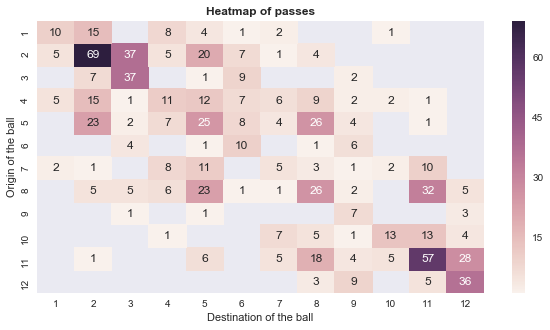

In [11]:
def create_heat(pivot_table):
    ax = sns.heatmap(pivot_table, annot = True)
    ax.set_xlabel("Destination of the ball")
    ax.set_ylabel("Origin of the ball")
    ax.set_title("Heatmap of passes", weight = "bold")

pivot_table = create_pivot(data, 0, 100)
create_heat(pivot_table)

In [12]:
x = pd.DataFrame(pivot_table)
dict_1 = x.to_dict()
list_1 = []

In [13]:
for i in range(1,13):
    for p in range(1,13):
        if dict_1[i][p] > 0:
            list_1.append((i, p, dict_1[i][p]))

In [14]:
import math    #we need it for infinity number in dijkstra
import networkx as nx    #this is for node visualisation

In [15]:
dict_3 = {1:(8,0), 2:(13,0), 3:(18,3), 4:(21,8), 5:(21,13), 6:(18,18), 7:(13,21), 8:(8,21), 9:(3,18), 10:(0,13), 11:(0,8), 12:(3,3)}
#positioning of nodes, I was working with the algorithms from package for 1h and they were
#looking bad, so I made the positioning by hand

In [16]:
def dijkstra(graph, all_edges, pos_for_nodes, start, goal):
    shortest_distance = {}
    predecessor = {}
    unseenNodes = graph
    infinity = math.inf
    path = []
    for node in unseenNodes:
        shortest_distance[node] = infinity
    shortest_distance[start] = 0
 
    while unseenNodes:
        minNode = None
        for node in unseenNodes:
            if minNode is None:
                minNode = node
            elif shortest_distance[node] < shortest_distance[minNode]:
                minNode = node
 
        for childNode, weight in graph[minNode].items():
            if weight + shortest_distance[minNode] < shortest_distance[childNode]:
                shortest_distance[childNode] = weight + shortest_distance[minNode]
                predecessor[childNode] = minNode
        unseenNodes.pop(minNode)
 
    currentNode = goal
    while currentNode != start:
        try:
            path.insert(0,currentNode)
            currentNode = predecessor[currentNode]
        except KeyError:
            print('Path not reachable')
            break
    path.insert(0,start)
    node_list=[]
    edge_list1=[]
    edge_list2=[]
    edge_list_final=[]
    if shortest_distance[goal] != infinity:
        Dg = nx.DiGraph()
        Dg.add_weighted_edges_from(all_edges)
        for i in range(len(path)):
            node_list.append(path[i])
        for i in range(len(path)-1):
            edge_list1.append(path[i])
            edge_list2.append(path[i+1])
        edge_list_final = list(zip(edge_list1, edge_list2))
        nx.draw_networkx(Dg, pos=pos_for_nodes, with_labels=True, arrows=False) #pos=dick2 pos=nx.spring_layout(Dg) node_color=('blue')
        nx.draw_networkx(Dg, pos=pos_for_nodes, with_labels=True, nodelist=node_list, node_color = 'orange', edgelist=edge_list_final, edge_color='blue')
        print('Shortest distance is ' + str(shortest_distance[goal])) #              
        print('And the path is ' + str(path))

Shortest distance is 6.0
And the path is [1, 7, 8, 12]


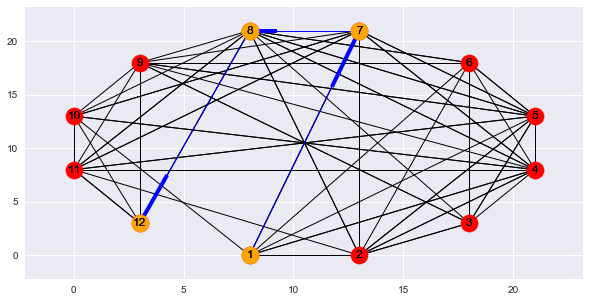

In [17]:
dijkstra(dict_1, list_1, dict_3, 1, 12)